---

# Exploring Data

---

In [13]:
data_folder = r'/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData'

In [14]:
import os

# List all folders within the data_folder directory
folders = [f.path for f in os.scandir(data_folder) if f.is_dir()]
print(folders)

['/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_003', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_004', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_005', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_006', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_007', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_008', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_009', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_010', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_011', '/mnt/c/U

In [15]:
# Display each file in each folder
for folder in folders:
    files = os.listdir(folder)
    for file in files:
        print(file)

BraTS20_Training_001_flair.nii.gz
BraTS20_Training_001_seg.nii.gz
BraTS20_Training_001_t1.nii.gz
BraTS20_Training_001_t1ce.nii.gz
BraTS20_Training_001_t2.nii.gz
BraTS20_Training_002_flair.nii.gz
BraTS20_Training_002_seg.nii.gz
BraTS20_Training_002_t1.nii.gz
BraTS20_Training_002_t1ce.nii.gz
BraTS20_Training_002_t2.nii.gz
BraTS20_Training_003_flair.nii.gz
BraTS20_Training_003_seg.nii.gz
BraTS20_Training_003_t1.nii.gz
BraTS20_Training_003_t1ce.nii.gz
BraTS20_Training_003_t2.nii.gz
BraTS20_Training_004_flair.nii.gz
BraTS20_Training_004_seg.nii.gz
BraTS20_Training_004_t1.nii.gz
BraTS20_Training_004_t1ce.nii.gz
BraTS20_Training_004_t2.nii.gz
BraTS20_Training_005_flair.nii.gz
BraTS20_Training_005_seg.nii.gz
BraTS20_Training_005_t1.nii.gz
BraTS20_Training_005_t1ce.nii.gz
BraTS20_Training_005_t2.nii.gz
BraTS20_Training_006_flair.nii.gz
BraTS20_Training_006_seg.nii.gz
BraTS20_Training_006_t1.nii.gz
BraTS20_Training_006_t1ce.nii.gz
BraTS20_Training_006_t2.nii.gz
BraTS20_Training_007_flair.nii.gz


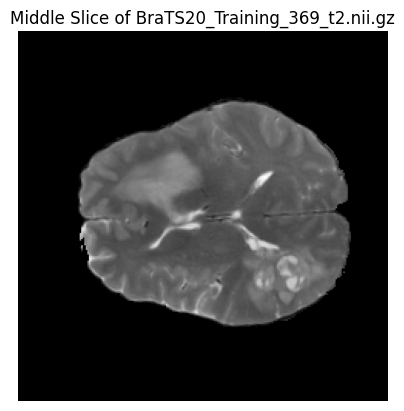

In [16]:
import nibabel as nib

import matplotlib.pyplot as plt

# Load the .nii file
nii_file_path = os.path.join(folder, file)
img = nib.load(nii_file_path)
data = img.get_fdata()

# Display the middle slice of the 3D image
middle_slice = data.shape[2] // 2
plt.imshow(data[:, :, middle_slice], cmap='gray')
plt.title(f'Middle Slice of {file}')
plt.axis('off')
plt.show()

In [17]:
import ipywidgets as widgets
from IPython.display import display

# Function to update the displayed slice
def update_slice(slice_index):
    plt.imshow(data[:, :, slice_index], cmap='gray')
    plt.title(f'Slice {slice_index} of {file}')
    plt.axis('off')
    plt.show()

# Create a slider widget
slice_slider = widgets.IntSlider(min=0, max=data.shape[2]-1, step=1, value=middle_slice)
widgets.interact(update_slice, slice_index=slice_slider)

interactive(children=(IntSlider(value=77, description='slice_index', max=154), Output()), _dom_classes=('widge…

<function __main__.update_slice(slice_index)>

---

# Creating Dataloader

---